# Styles

Multiplex comes with multiple styles to quickly customize the look and feel of your visualizations. This notebook is a quick reference to help you see how the different styles look with different visualizations.

Each style has one primary color `C0`, a highlight color `C1` and a background color `C2`.

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

from multiplex import drawable
drawable = importlib.reload(drawable)

In [2]:
def draw_timeseries(viz):
    """
    Draw a timeseries on the provided visualization.
    
    :param viz: The visualization where the timeseries will be drawn.
    :type viz: :class:`multiple.drawable.Drawable`
    """
    
    viz.set_xlim(-1, 11)
    viz.set_ylim(0.2, 0.8)
    viz.set_xlabel('Time')
    viz.set_ylabel('Value')

    for i, label in zip(range(3, 0, -1), [ 'C', 'B', 'A' ]):
        viz.draw_time_series(range(10), np.linspace(0.4, 0.7 - 0.15 * i, num=10) + np.random.normal(0, 0.03, 10),
                             color=('C1' if i == 1 else 'C0'),
                             linewidth=(3 if i == 1 else 2),
                             label=label)
    
    viz.set_title('Time series', loc='left')
    viz.set_caption('A simple time series.')

def draw_text(viz):
    """
    Draw annotated text on the provided visualization.
    
    :param viz: The visualization where the text annotation will be drawn.
    :type viz: :class:`multiple.drawable.Drawable`
    """
    
    paragraph = "Anthony Lopes is a Portuguese professional footballer who plays for \
Olympique Lyonnais as a goalkeeper. He came through the youth ranks at Lyon, being \
called to the first team in 2011 and making his debut the following year."
    tokens = nltk.word_tokenize(paragraph)
    pos_tags = nltk.pos_tag(tokens)
    chunks = [ entity for entity in nltk.ne_chunk(pos_tags, binary=True) ]

    tokens = []
    for chunk in chunks:
        if type(chunk) == nltk.tree.Tree:
            for entity_chunk in chunk:
                entity, _ = entity_chunk
                tokens.append({
                    'style': {
                        'facecolor': 'C1',
                        'color': 'C2',
                    },
                    'text': entity,
                })
        else:
            token, _ = chunk
            tokens.append(token)

    viz.draw_text_annotation(tokens, align='justify', alpha=0.8, fontfamily='serif', lpad=0.05, rpad=0.05, tpad=0.1)
    viz.axis.set_ylim(0.35, -0.25)
    viz.set_title('Text annotation', loc='left')
    viz.set_caption('A simple text annotation visualization.')

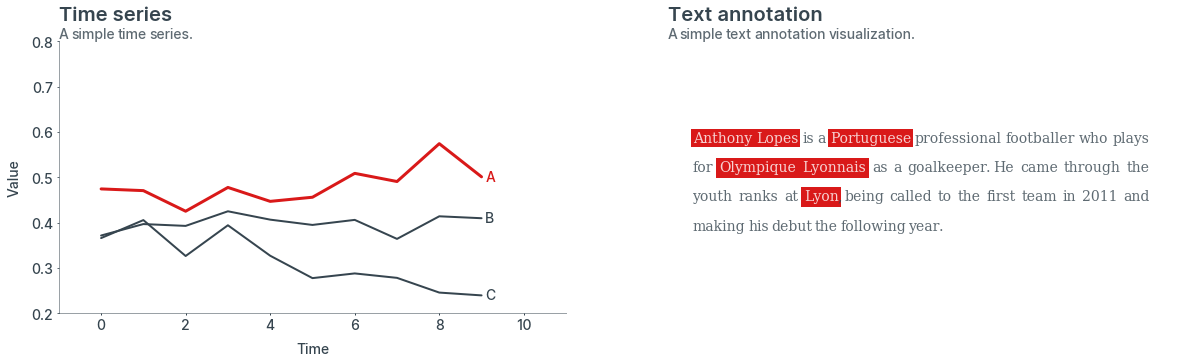

In [3]:
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "fire.style"))

figure, axes = plt.subplots(1, 2, figsize=(20, 5))
draw_timeseries(drawable.Drawable(figure, axes[0]))
draw_text(drawable.Drawable(figure, axes[1]))
plt.show()

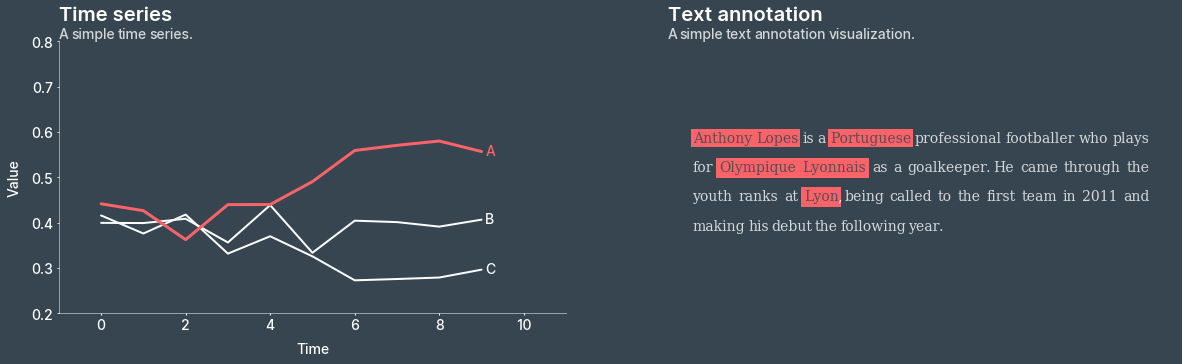

In [4]:
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "fire-dark.style"))

figure, axes = plt.subplots(1, 2, figsize=(20, 5))
draw_timeseries(drawable.Drawable(figure, axes[0]))
draw_text(drawable.Drawable(figure, axes[1]))
plt.show()